Causal inference in multivariate time series

In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import random
import pathlib
import datetime
import numpy as np
import pandas as pd
from scms import SCMS
import functions as f1
import dataloader as datasets
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

np.random.seed(1)

In [25]:
# Normalization (Standard)
def normalize(data, type='minmax'):

    if type=='std':
        return (np.array(data) - np.mean(data))/np.std(data)
     
    elif type=='minmax':
        return (np.array(data) - np.min(data))/(np.max(data) - np.min(data))

In [26]:
# Load data from a .npz file
# file_path = r'datasets/netsim/sim3_subject_7.npz'
# loaded_data = np.load(file_path)

# n = loaded_data['n.npy']
# T = loaded_data['T.npy']
# Gref = loaded_data['Gref.npy']
# # Access individual arrays within the .npz file
# data = loaded_data['X_np.npy']
# data = data.transpose()

# df = pd.DataFrame(data[:, 5:15])

df = datasets.load_flux_data()
# df = df.apply(normalize)

nodes = len(df.columns)
params = {'g_one_start': 0,
                  'g_one_end': int(nodes/2),
                  'g_two_start': int(nodes/2),
                  'g_two_end': nodes
                 }

In [27]:
# Modify the code for complete experiments
plot_path = r"../plots/"
edge_densities = np.arange(0.2, 1.1, 0.1)
etests = len(edge_densities)
group_sizes = np.arange(3, 6, 2)
# group_sizes = np.array([6])
gtests = len(group_sizes)
res_all = []

for g in range(etests):

    edge_density = edge_densities[g]
    res = np.zeros((3, 3))

    for t in range(gtests):

        nodes = group_sizes[t]
        params = {'g_one_start': 0,
                  'g_one_end': int(nodes/2),
                  'g_two_start': int(nodes/2),
                  'g_two_end': nodes
                 }

        dag = SCMS(nodes, edge_density)
        df, links = dag.df_timeseries()



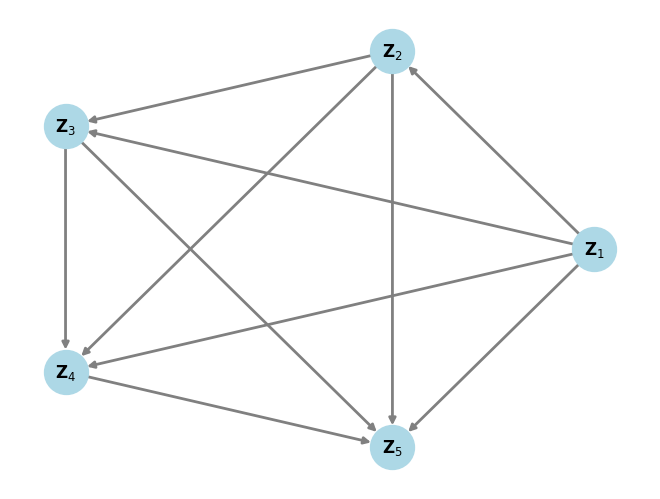

In [28]:
dag.draw_DAG()

In [29]:
# df.corr()

In [30]:
# res02 = [3, 0, 0]
# res03 = [3, 0, 0]
# res04 = [3, 0, 0]
# res05 = [3, 0, 0]
# res06 = [3, 0, 0]
# res07 = [3, 0, 0]
# res08 = [2, 1, 0]
# res09 = [3, 0, 0]
# res10 = [3, 0, 0]

# res_all = np.array([res02, res03, res04, res05, res06, res07, res08, res09, res10])/3
# filename = pathlib.Path(plot_path + f"gCDMI.pdf")

# for x in range(3):

#     plt.xlabel('Interaction Density')
#     plt.ylabel('Percentages')
#     plt.ylim(-0.1, 1.10)
#     plt.plot(edge_densities, res_all[:, x], label= f'gCDMI_{outcome[x]}')
    
# plt.legend()
# plt.savefig(filename)
# plt.show()

In [31]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.patches import Patch

# # Sample data (replace this with your own data)
# data1 = sns.load_dataset("iris")
# data2 = sns.load_dataset("tips")

# # Create a single plot
# plt.figure(figsize=(8, 6))

# # Plot the first bivariate distribution with transparency and boundaries
# sns.kdeplot(data=data1, x="sepal_length", y="sepal_width", fill=True, cmap="Blues", alpha=0.5, levels=5, color="blue", label="Iris")

# # Plot the second bivariate distribution on top with transparency and boundaries
# sns.kdeplot(data=data2, x="total_bill", y="tip", fill=True, cmap="Reds", alpha=0.5, levels=5, color="red", label="Tips")

# # Set labels and title
# plt.xlabel("X-axis Label")
# plt.ylabel("Y-axis Label")
# plt.title("Overlay of Bivariate Distributions with Transparency and Boundaries")

# # Add a custom legend
# legend_elements = [
#     Patch(facecolor='skyblue', alpha=0.5, edgecolor='k', label='Iris'),
#     Patch(facecolor='red', alpha=0.5, edgecolor='k', label='Tips')
# ]
# plt.legend(handles=legend_elements)

# # Show the plot
# plt.show()


In [32]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from matplotlib.patches import Patch

# # Sample data (replace this with your own data)
# data1 = sns.load_dataset("iris")
# data2 = sns.load_dataset("tips")

# # Create a single plot
# plt.figure(figsize=(8, 6))

# # Plot the first bivariate distribution with transparency and boundaries
# sns.kdeplot(data=data1, x="sepal_length", y="sepal_width", cmap="Blues", fill=True, alpha=0.95, levels=5, color="blue", label="Iris")

# # Plot the second bivariate distribution on top with transparency and boundaries
# sns.kdeplot(data=data2, x="total_bill", y="tip", cmap="Reds", alpha=0.65, fill=True, levels=5, color="red", label="Tips")

# # Set labels and title
# plt.xlabel("X-axis Label")
# plt.ylabel("Y-axis Label")
# plt.title("Overlay of Bivariate Distributions with Transparency and Boundaries")

# # Add a custom legend
# legend_elements = [
#     Patch(facecolor='blue', edgecolor='k', label='Iris'),
#     Patch(facecolor='red', edgecolor='k', label='Tips')
# ]
# plt.legend(handles=legend_elements)

# # Show the plot
# plt.show()


In [33]:
# def is_ond(month):
#     return (month >= 10) & (month <= 12)


# xdata = xr.open_dataset('AirTempData.nc')
# Xregion = xdata.sel(lat=slice(6.,-6., 2), lon = slice(190.,240.,2),
#                   time=(xdata['time.month'] >= 10) & (xdata['time.month'] <= 12))
# df = Xregion.to_dataframe()

In [34]:
# # Define latitude and longitude slices for the X and Y regions
# k = slice(6., -6.)
# i = slice(190., 240.)
# j = slice(65., 50.)
# l = slice(200., 240.)

# # Select data for X and Y regions based on latitude and longitude slices
# Xregion = xdata.sel(lat=k, lon=i)
# Yregion = xdata.sel(lat=j, lon=l)

# # Define a list of months you're interested in (e.g., October, November, December)
# selected_months = [5]

# # Select data for the specified months in Xregion and Yregion
# Xregion_selected_months = Xregion.where(Xregion['time.month'].isin(selected_months), drop=True)
# Yregion_selected_months = Yregion.where(Yregion['time.month'].isin(selected_months), drop=True)

# # Now, Xregion_selected_months and Yregion_selected_months contain data for the selected months.


In [35]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a sample DataFrame
# data = {
#     'G$_{11}$': [1, 2, 3, 4, 5],
#     'G$_{12}$': [5, 4, 3, 2, 1],
#     'G$_{21}$': [10, 20, 30, 40, 50],
#     'G$_{22}$': [50, 40, 30, 20, 10]
# }

# df = pd.DataFrame(data)

# # Calculate the correlation matrix
# correlation_matrix = df.corr()

# # Create a heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title("Correlation Plot")
# plt.show()
